<a href="https://colab.research.google.com/github/gtafuri/IntroCompNumerica/blob/main/RegraSimpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando Regra 1/3 de Simpson nas funções dos trapézios repetidos

> Implementar a Regra 1/3 de Simposon no collab no qual se aplicou o MTR (meotodo trapezios repetidos) dados: f uma função contínua a < b, a, b pertence aos reais n é inteiro positivo

por Giulia Tafuri


In [ ]:
#Aplicando a lógica do metodo de trapezios repetidos (feito na última aula)
def metodo_trapezios_repetidos(f, a, b, n):
    """
    Método dos Trapézios Repetidos para aproximar a integral de f no intervalo [a, b] com n intervalos.

    Parâmetros:
    f -- função contínua
    a -- limite inferior
    b -- limite superior
    n -- número de subintervalos

    Retorna:
    Aproximação da integral
    """
    h = (b - a) / n
    soma = f(a) + f(b)

    for i in range(1, n): #utilizando o for como recomendado pelo professor
        xi = a + i * h
        soma += 2 * f(xi)

    return (h / 2) * soma


In [ ]:
#Aplicando a lógica da Regra 1/3 de Simpson
def simpson_13(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n deve ser par para a Regra 1/3 de Simpson.")

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    soma = y[0] + y[-1]
    soma += 4 * np.sum(y[1:-1:2])  # ímpares
    soma += 2 * np.sum(y[2:-2:2])  # pares

    return (h / 3) * soma

Aplicando trapezios e 1/3 de Simpson a função f(x)= x(x-10)



In [ ]:
#exemplo de uso
import math
import numpy as np
# Função a ser integrada
f = lambda x: x*(x-10)

# Intervalo e número de subintervalos
a = 0
b = 1
n = 100

# Cálculo da integral aproximada
aprox = metodo_trapezios_repetidos(f, a, b, n)
aprox_simpson = simpson_13(f, a, b, n)
print(f"Aproximação da integral de x(x-10) de {a} a {b} com n={n}: {aprox:.6f}")
valor_exato = (b**3)/3 - 5*(b**2)

# Impressão dos resultados
print(f"Aproximação (Trapézios)    com n = {n}: {aprox:.6f}")
print(f"Aproximação (Simpson 1/3)  com n = {n}: {aprox_simpson:.6f}")
print(f"Valor exato:                   {valor_exato:.6f}")
print(f"Erro Trapézios:          {abs(aprox - valor_exato):.2e}")
print(f"Erro Simpson:            {abs(aprox_simpson - valor_exato):.2e}")

Aproximação da integral de x(x-10) de 0 a 1 com n=100: -4.666650
Aproximação (Trapézios)    com n = 100: -4.666650
Aproximação (Simpson 1/3)  com n = 100: -4.666667
Valor exato:                   -4.666667
Erro Trapézios:          1.67e-05
Erro Simpson:            0.00e+00


Comparação gráfica dos metódos

> Esse gráfico compara o resultado exato da integração com os valores de aproximação encontrados pelos 2 metódos analisados, em função da mudança dos valores de n



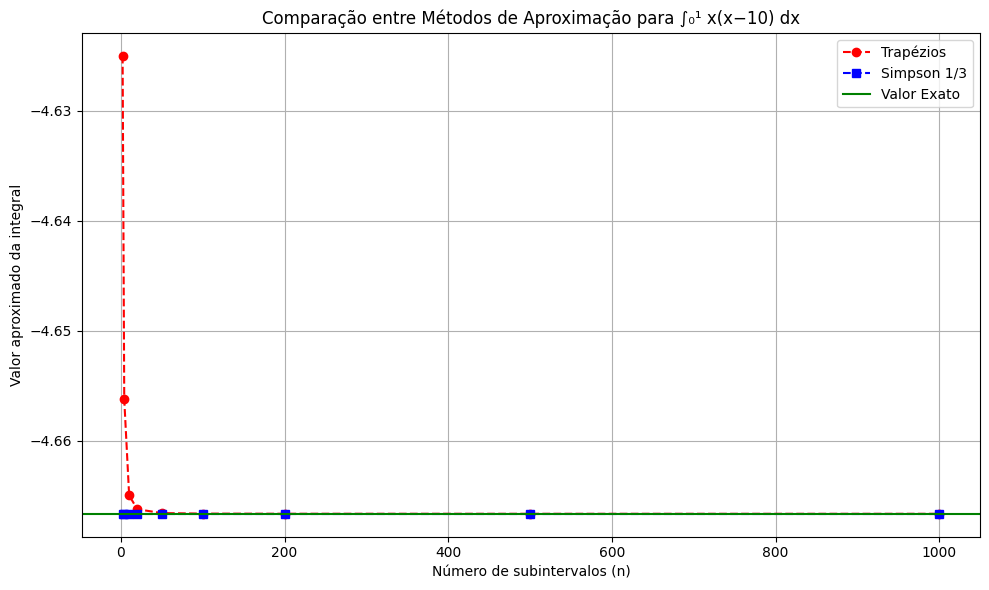

In [ ]:
import matplotlib.pyplot as plt

# Função
f = lambda x: x*(x-10)

# Lista de valores de n para análise
n_vals = [2, 4, 10, 20, 50, 100, 200, 500, 1000]

# Valor exato da integral ∫₀¹ x(x−10) dx = (1/3 - 5) = -4.666666...
valor_exato = (1**3)/3 - 5*(1**2)

# aproximações
trap_vals = [metodo_trapezios_repetidos(f, 0, 1, n) for n in n_vals]
simp_vals = [simpson_13(f, 0, 1, n if n % 2 == 0 else n + 1) for n in n_vals]

# resultados
plt.figure(figsize=(10, 6))
plt.plot(n_vals, trap_vals, 'ro--', label='Trapézios')
plt.plot(n_vals, simp_vals, 'bs--', label='Simpson 1/3')
plt.axhline(valor_exato, color='green', linestyle='-', label='Valor Exato')
plt.title("Comparação entre Métodos de Aproximação para ∫₀¹ x(x−10) dx")
plt.xlabel("Número de subintervalos (n)")
plt.ylabel("Valor aproximado da integral")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Comparando os erros de cada metodo de acordo com o número de subintervalos (por recomendação do professor)
